In [259]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Organizing data

In [83]:
#changong data types to datetime format for users table

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)
users = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [84]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


# Exploring data

Question: how many unique users I have in my data set?

Answer: 407 

Question: how many charging points do I have?

Answer: 54 

In [93]:
users.nunique()

WhPerMile              82
kWhRequested          566
milesRequested         55
minutesAvailable      777
paymentRequired         1
userID                407
Modified            17075
Departure           15267
dtype: int64

In [94]:
charging.nunique()

_id               28042
clusterID             1
kWhDelivered      14409
sessionID         28042
siteID                1
spaceID              54
stationID            54
timezone              1
userID              407
ConnectionTime    28000
DisconnectTime    28005
DoneCharging      27171
dtype: int64

Question: what time period I have data for?

Answer: April 2018 - June 2020

In [99]:
charging.ConnectionTime.max(),  charging.ConnectionTime.min()

(Timestamp('2020-06-29 23:09:54+0000', tz='UTC'),
 Timestamp('2018-04-25 11:08:04+0000', tz='UTC'))

In [100]:
users.Modified.max(), users.Modified.min()

(Timestamp('2020-06-29 23:11:53+0000', tz='UTC'),
 Timestamp('2018-04-30 15:08:54+0000', tz='UTC'))

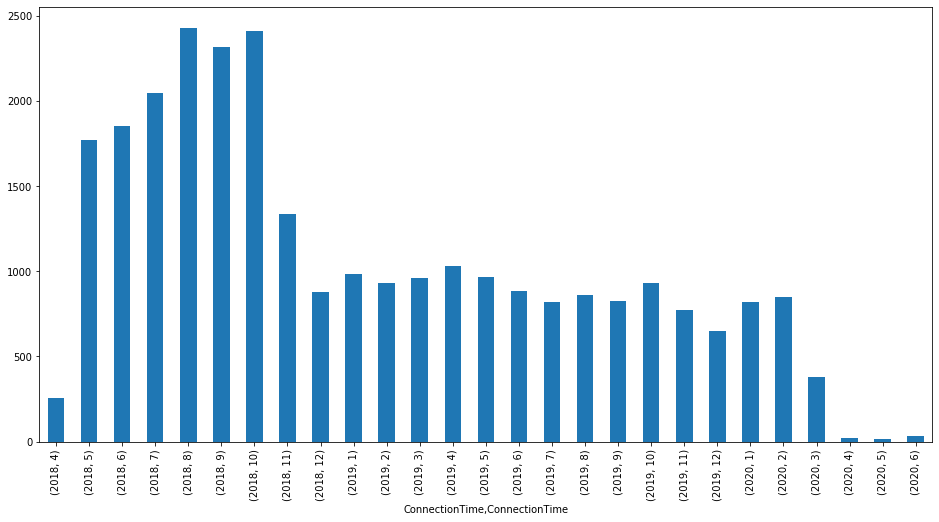

In [106]:
charging["ConnectionTime"].groupby([charging["ConnectionTime"].dt.year, charging["ConnectionTime"].dt.month]).count().plot(kind="bar", figsize = (16, 8))

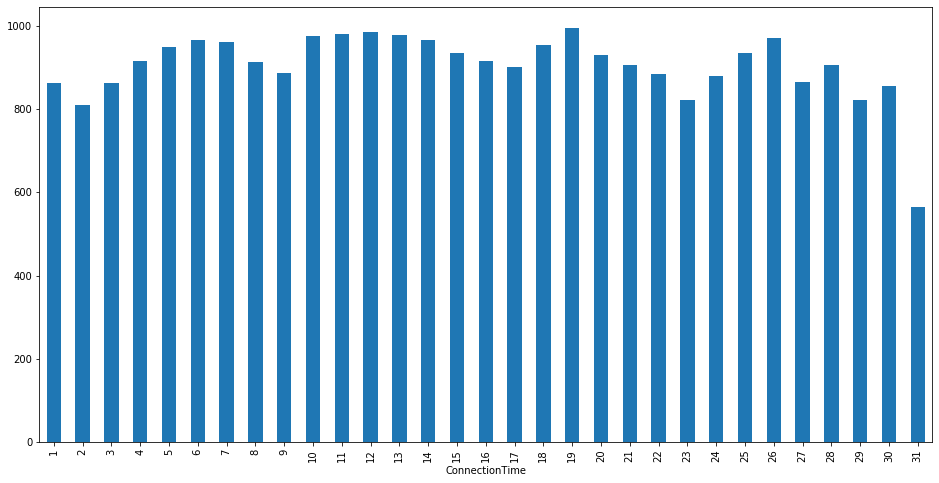

In [107]:
charging["ConnectionTime"].groupby([charging["ConnectionTime"].dt.day]).count().plot(kind="bar", figsize = (16, 8))

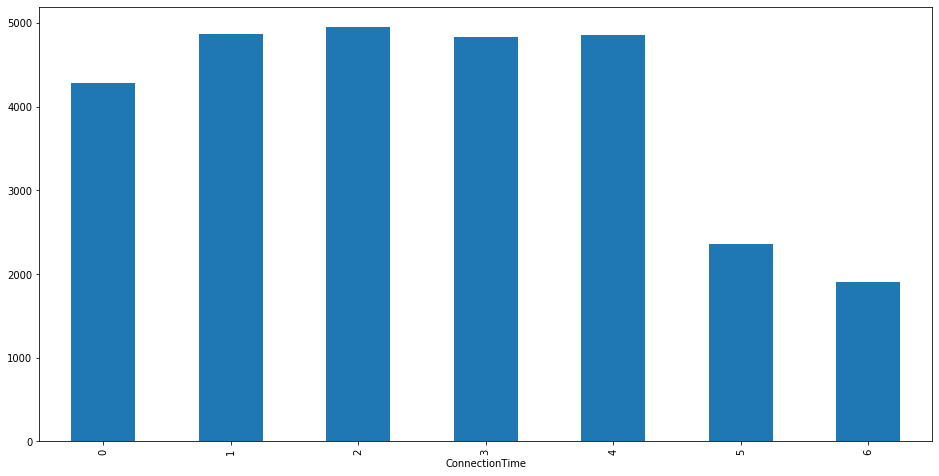

In [108]:
charging["ConnectionTime"].groupby([charging["ConnectionTime"].dt.weekday]).count().plot(kind="bar", figsize = (16, 8))

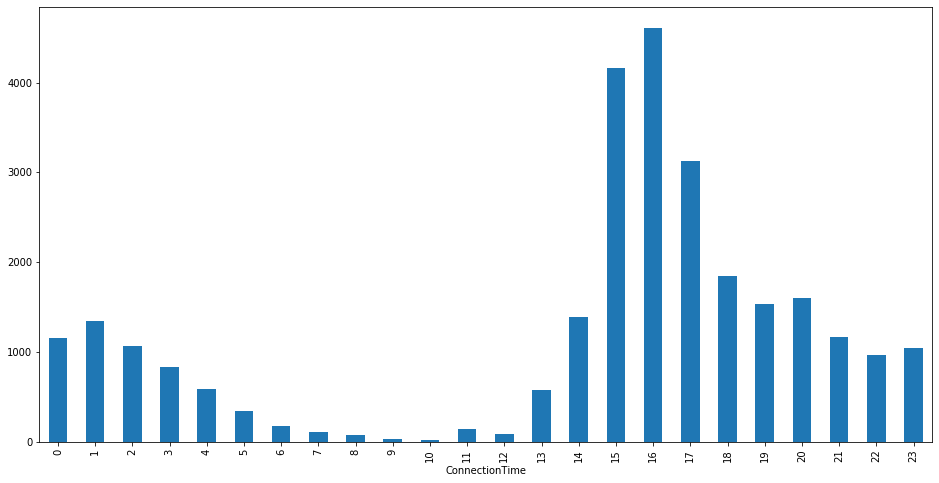

In [109]:
charging["ConnectionTime"].groupby([charging["ConnectionTime"].dt.hour]).count().plot(kind="bar", figsize = (16, 8))

In [110]:
users.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000
mean,370.274075,21.847404,63.680635,288.012665,1103.289716
std,101.562645,19.655481,57.357672,184.853041,937.954080
min,200.000000,2.000000,10.000000,1.000000,1.000000
25%,295.000000,8.000000,20.000000,130.000000,562.000000
50%,400.000000,16.000000,40.000000,258.000000,838.000000
75%,400.000000,28.000000,80.000000,426.750000,1238.000000
max,600.000000,180.000000,300.000000,1913.000000,6952.000000


In [111]:
charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,28042.0,28042.000000,28042.0,13275.000000
mean,39.0,8.898859,2.0,1093.202109
std,0.0,8.088413,0.0,871.109487
min,39.0,0.501000,2.0,1.000000
25%,39.0,3.422000,2.0,567.000000
50%,39.0,6.695000,2.0,869.000000
75%,39.0,12.675000,2.0,1222.000000
max,39.0,75.528000,2.0,6952.000000


# Correlation between the time of day & amount charged

In [135]:
data = charging[['kWhDelivered','ConnectionTime']]
data['Hour'] = data['ConnectionTime'].dt.hour
data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,kWhDelivered,ConnectionTime,Hour
0,7.932,2018-04-25 11:08:04+00:00,11
1,10.013,2018-04-25 13:45:10+00:00,13
2,5.257,2018-04-25 13:45:50+00:00,13
3,5.177,2018-04-25 14:37:06+00:00,14
4,10.119,2018-04-25 14:40:34+00:00,14
...,...,...,...
28037,1.182,2020-06-26 16:18:15+00:00,16
28038,13.310,2020-06-26 17:29:38+00:00,17
28039,1.390,2020-06-27 23:52:13+00:00,23
28040,47.437,2020-06-28 21:18:05+00:00,21


In [171]:
# what is of average amount of energy delivered, if session starts at a certain hour

sessions = data.groupby('Hour').count()['kWhDelivered']
hours = range(0, 24)

kWh = data.groupby('Hour').sum()['kWhDelivered']
kWh, sessions
avg_session = kWh / sessions
avg_session

Hour
0      8.782697
1      8.995786
2      9.632508
3     10.059836
4     10.645924
5     11.145629
6     13.914140
7     10.710025
8     13.684781
9     16.134614
10     7.527913
11    11.150269
12     8.871691
13    10.741733
14     9.931794
15     9.185118
16     9.028086
17     9.048865
18     8.511962
19     7.852252
20     6.850442
21     7.170103
22     7.339031
23     7.718235
Name: kWhDelivered, dtype: float64

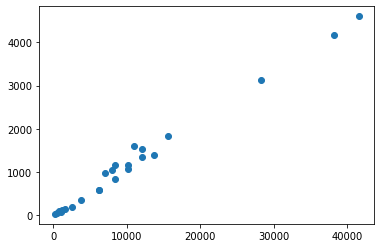

In [150]:
plt.scatter(kWh, sessions)

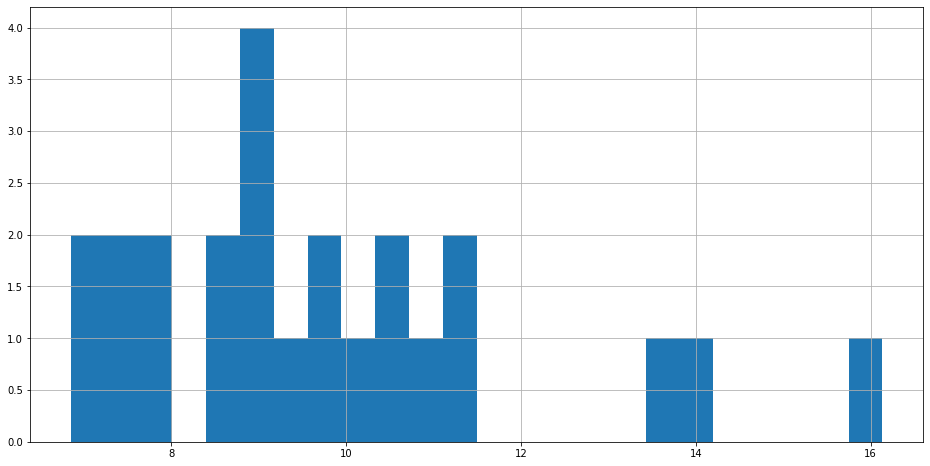

In [179]:
avg_session.hist(bins = 24, figsize = (16, 8))

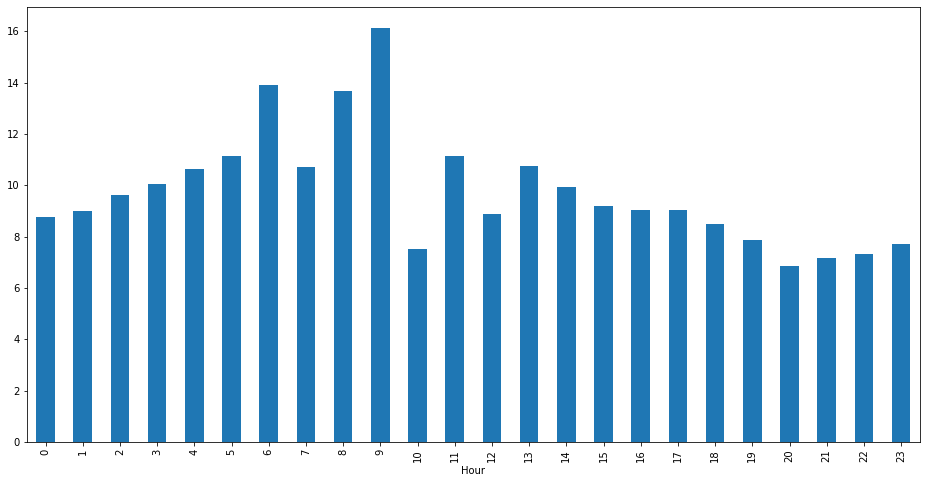

In [161]:
avg_session.plot(kind="bar", figsize = (16, 8))

In [246]:
#kWh delivered

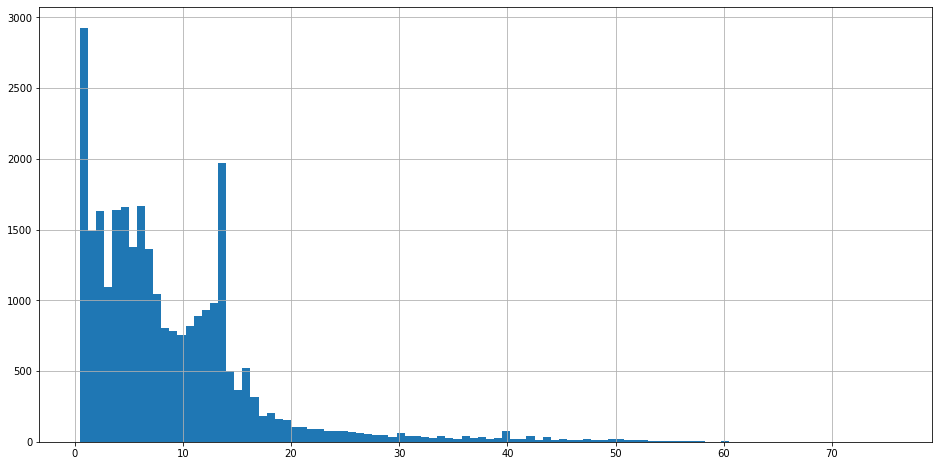

In [248]:
kWh_charged = charging.kWhDelivered
kWh_charged.hist(bins = 100, figsize = (16, 8))

# Explore random variable kWhRequested

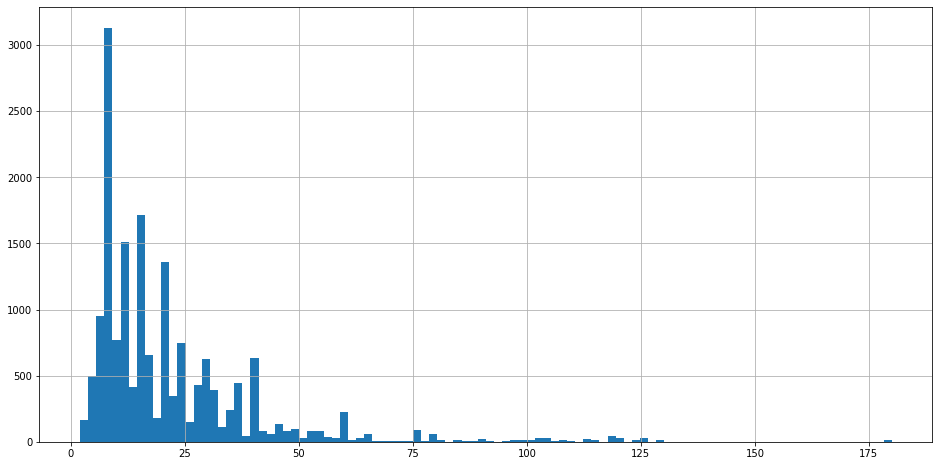

In [262]:
kWh_request = users.kWhRequested
kWh_request.hist(bins = 100, figsize = (16, 8))

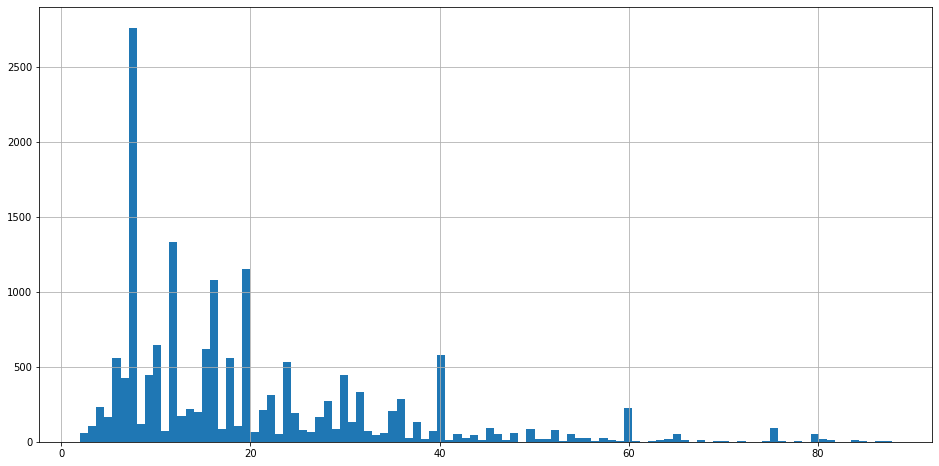

In [263]:
kWh_request = users[users.kWhRequested < 90].kWhRequested
kWh_request.hist(bins = 100, figsize = (16, 8))

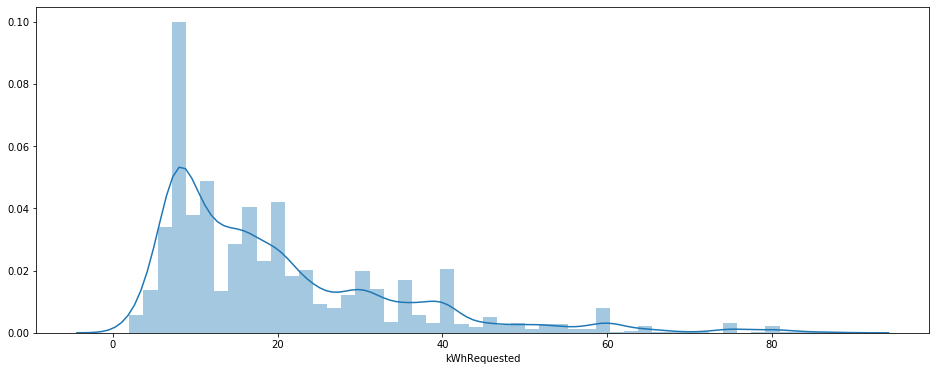

In [264]:
ax, fig = plt.subplots(figsize = (16, 6))
ax = sns.distplot(kWh_request, bins = 50)

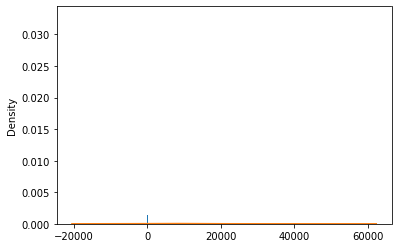

In [253]:
#need to normalize the data
ax = kWh_request.plot.hist(density = True)
kWh.plot.density(ax = ax)

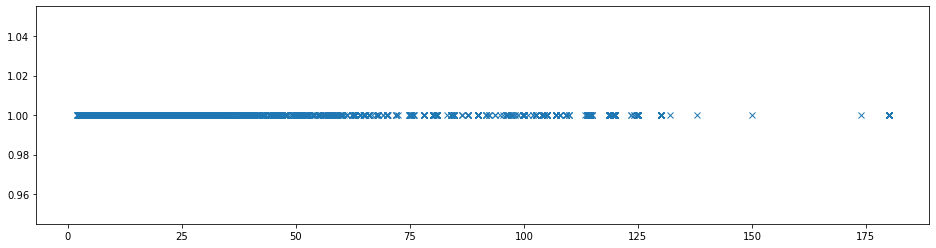

In [224]:
fig, ax = plt.subplots(figsize =(16, 4))
ax.plot(kWh_request, len(kWh_request)*[1], 'x' )

#one_dim_scatterplot(kWh_request, ax) # plots true data

In [225]:
kWh_request.describe()

count    17134.000000
mean        21.847404
std         19.655481
min          2.000000
25%          8.000000
50%         16.000000
75%         28.000000
max        180.000000
Name: kWhRequested, dtype: float64

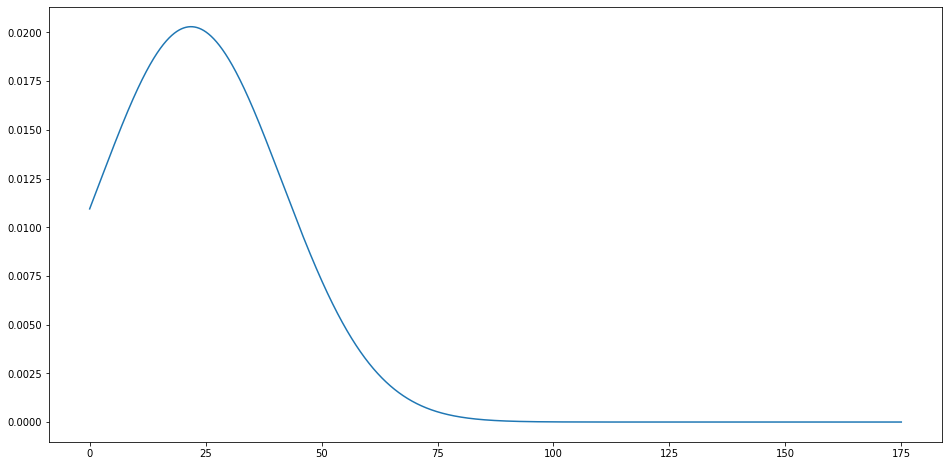

In [245]:
x = np.linspace(0, 175, num = 17134)
y = stats.norm(21.847404, 19.655481)
y1 = kWh_request
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(x, y.pdf(x))

